In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('spreadspoke_scores.csv')
raw_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [3]:
df = raw_data.copy()

In [4]:
df.describe(include='all')

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
count,12667,12667.000000,12667,12667,12667,12411.000000,12411.000000,12667,9932,9932.000000,9922,12667,12667,11934.000000,11934.000000,8388,2637
unique,2348,NaN,24,2,41,NaN,NaN,41,33,NaN,68,106,2,NaN,NaN,95,8
top,01/02/2005,NaN,2,False,Dallas Cowboys,NaN,NaN,Pittsburgh Steelers,PIT,NaN,41,Giants Stadium,False,NaN,NaN,74,DOME
freq,16,NaN,783,12157,451,NaN,NaN,442,449,NaN,593,531,12570,NaN,NaN,276,2405
mean,NaN,1994.413436,NaN,NaN,NaN,22.353477,19.533317,NaN,NaN,-5.372634,NaN,NaN,NaN,58.618988,7.853276,NaN,NaN
std,NaN,15.286737,NaN,NaN,NaN,10.576692,10.140134,NaN,NaN,3.417437,NaN,NaN,NaN,15.539685,5.627164,NaN,NaN
min,NaN,1966.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,-26.500000,NaN,NaN,NaN,-6.000000,0.000000,NaN,NaN
25%,NaN,1981.000000,NaN,NaN,NaN,14.000000,13.000000,NaN,NaN,-7.000000,NaN,NaN,NaN,48.000000,4.000000,NaN,NaN
50%,NaN,1995.000000,NaN,NaN,NaN,21.000000,20.000000,NaN,NaN,-4.500000,NaN,NaN,NaN,61.000000,8.000000,NaN,NaN
75%,NaN,2008.000000,NaN,NaN,NaN,29.000000,27.000000,NaN,NaN,-3.000000,NaN,NaN,NaN,72.000000,12.000000,NaN,NaN


### Removing rows with missing values

In [5]:
df = df.drop(['weather_detail'], axis=1)

In [6]:
df.isnull().sum()

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home              256
score_away              256
team_away                 0
team_favorite_id       2735
spread_favorite        2735
over_under_line        2745
stadium                   0
stadium_neutral           0
weather_temperature     733
weather_wind_mph        733
weather_humidity       4279
dtype: int64

In [7]:
df_no_mv = df.dropna(axis=0)

In [8]:
df_no_mv = df_no_mv[df_no_mv.schedule_playoff != True] 
df_no_mv = df_no_mv[df_no_mv.stadium_neutral != True] 

In [9]:
df_no_mv.describe(include='all')

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
count,6271,6271.000000,6271,6271,6271,6271.000000,6271.000000,6271,6271,6271.000000,6271,6271,6271,6271.000000,6271.000000,6271
unique,1202,NaN,18,1,36,NaN,NaN,39,33,NaN,62,48,1,NaN,NaN,93
top,12/08/2002,NaN,2,False,New York Giants,NaN,NaN,Philadelphia Eagles,DEN,NaN,37,Giants Stadium,False,NaN,NaN,74
freq,15,NaN,410,6271,276,NaN,NaN,227,328,NaN,408,486,6271,NaN,NaN,201
mean,NaN,1996.273322,NaN,NaN,NaN,22.202201,19.190560,NaN,NaN,-5.378648,NaN,NaN,NaN,55.591134,10.044650,NaN
std,NaN,10.014006,NaN,NaN,NaN,10.344062,10.091679,NaN,NaN,3.467234,NaN,NaN,NaN,15.570817,4.474017,NaN
min,NaN,1979.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,-26.500000,NaN,NaN,NaN,-3.000000,0.000000,NaN
25%,NaN,1988.000000,NaN,NaN,NaN,14.000000,12.000000,NaN,NaN,-7.000000,NaN,NaN,NaN,45.000000,7.000000,NaN
50%,NaN,1997.000000,NaN,NaN,NaN,21.000000,19.000000,NaN,NaN,-4.500000,NaN,NaN,NaN,57.000000,9.000000,NaN
75%,NaN,2005.000000,NaN,NaN,NaN,28.000000,26.000000,NaN,NaN,-3.000000,NaN,NaN,NaN,67.000000,12.000000,NaN


### Adding Columns

In [10]:
df_ac = df_no_mv.copy()

In [11]:
df_ac = df_ac.loc[df_ac['schedule_season'] >= 2000]
df_ac['over_under_line'] = df_ac['over_under_line'].astype(float)
df_ac['schedule_week'] = df_ac['schedule_week'].astype(int)

In [12]:
df_ac['score_total'] = df_ac['score_home'] + df_ac['score_away']
df_ac['over_under_diff'] = df_ac['score_total'].sub(df_ac['over_under_line'])

df_ac['over'] = ''
df_ac.loc[df_ac['over_under_diff'] >= 0.0, ['over']] = 1
df_ac.loc[df_ac['over_under_diff'] <= -0.1, ['over']] = 0

df_ac['under'] = ''
df_ac.loc[df_ac['over_under_diff'] <= 0.0, ['under']] = 1
df_ac.loc[df_ac['over_under_diff'] >= 0.1, ['under']] = 0

df_ac['home_diff'] = df_ac['score_home'] - df_ac['score_away']

df_ac['home_win'] = ''
df_ac.loc[df_ac['home_diff'] >= 0.1, ['home_win']] = 1
df_ac.loc[df_ac['home_diff'] <= 0.0, ['home_win']] = 0

df_ac['away_win'] = ''
df_ac.loc[df_ac['home_diff'] <= -0.1, ['away_win']] = 1
df_ac.loc[df_ac['home_diff'] >= 0.0, ['away_win']] = 0

df_ac.loc[df_ac['team_favorite_id'] == 'BUF', 'team_favorite_id'] = 'Buffalo Bills'
df_ac.loc[df_ac['team_favorite_id'] == 'CLE', 'team_favorite_id'] = 'Cleveland Browns'
df_ac.loc[df_ac['team_favorite_id'] == 'DAL', 'team_favorite_id'] = 'Dallas Cowboys'
df_ac.loc[df_ac['team_favorite_id'] == 'GB', 'team_favorite_id'] = 'Green Bay Packers'
df_ac.loc[df_ac['team_favorite_id'] == 'KC', 'team_favorite_id'] = 'Kansas City Chiefs'
df_ac.loc[df_ac['team_favorite_id'] == 'MIA', 'team_favorite_id'] = 'Miami Dolphins'
df_ac.loc[df_ac['team_favorite_id'] == 'NE', 'team_favorite_id'] = 'New England Patriots'
df_ac.loc[df_ac['team_favorite_id'] == 'NYG', 'team_favorite_id'] = 'New York Giants'
df_ac.loc[df_ac['team_favorite_id'] == 'OAK', 'team_favorite_id'] = 'Oakland Raiders'
df_ac.loc[df_ac['team_favorite_id'] == 'PIT', 'team_favorite_id'] = 'Pittsburgh Steelers'
df_ac.loc[df_ac['team_favorite_id'] == 'WAS', 'team_favorite_id'] = 'Washington Redskins'
df_ac.loc[df_ac['team_favorite_id'] == 'ARI', 'team_favorite_id'] = 'Arizona Cardinals'
df_ac.loc[df_ac['team_favorite_id'] == 'BAL', 'team_favorite_id'] = 'Baltimore Ravens'
df_ac.loc[df_ac['team_favorite_id'] == 'CIN', 'team_favorite_id'] = 'Cincinnati Bengals'
df_ac.loc[df_ac['team_favorite_id'] == 'DEN', 'team_favorite_id'] = 'Denver Broncos'
df_ac.loc[df_ac['team_favorite_id'] == 'PHI', 'team_favorite_id'] = 'Philadelphia Eagles'
df_ac.loc[df_ac['team_favorite_id'] == 'SD', 'team_favorite_id'] = 'San Diego Chargers'
df_ac.loc[df_ac['team_favorite_id'] == 'SF', 'team_favorite_id'] = 'San Francisco 49ers'
df_ac.loc[df_ac['team_favorite_id'] == 'SEA', 'team_favorite_id'] = 'Seattle Seahawks'
df_ac.loc[df_ac['team_favorite_id'] == 'TB', 'team_favorite_id'] = 'Tampa Bay Buccaneers'
df_ac.loc[df_ac['team_favorite_id'] == 'TEN', 'team_favorite_id'] = 'Tennessee Titans'
df_ac.loc[df_ac['team_favorite_id'] == 'NYJ', 'team_favorite_id'] = 'New York Jets'
df_ac.loc[df_ac['team_favorite_id'] == 'CAR', 'team_favorite_id'] = 'Carolina Panthers'
df_ac.loc[df_ac['team_favorite_id'] == 'CHI', 'team_favorite_id'] = 'Chicago Bears'
df_ac.loc[df_ac['team_favorite_id'] == 'JAX', 'team_favorite_id'] = 'Jacksonville Jaguars'
df_ac.loc[df_ac['team_favorite_id'] == 'NO', 'team_favorite_id'] = 'New Orleans Saints'
df_ac.loc[df_ac['team_favorite_id'] == 'HOU', 'team_favorite_id'] = 'Houston Texans'
df_ac.loc[df_ac['team_favorite_id'] == 'IND', 'team_favorite_id'] = 'Indianapolis Colts'
df_ac.loc[df_ac['team_favorite_id'] == 'LAC', 'team_favorite_id'] = 'Los Angeles Chargers'
df_ac.loc[df_ac['team_favorite_id'] == 'LAR', 'team_favorite_id'] = 'Los Angeles Rams'
df_ac.loc[df_ac['team_favorite_id'] == 'MIN', 'team_favorite_id'] = 'Minnesota Vikings'
df_ac.loc[df_ac['team_favorite_id'] == 'DET', 'team_favorite_id'] = 'Detroit Lions'
df_ac.loc[df_ac['team_favorite_id'] == 'ATL', 'team_favorite_id'] = 'Atlanta Falcons'

df_ac.loc[df_ac['team_home'] == 'San Diego Chargers', 'team_home'] = 'Los Angeles Chargers'
df_ac.loc[df_ac['team_away'] == 'San Diego Chargers', 'team_away'] = 'Los Angeles Chargers'
df_ac.loc[df_ac['team_home'] == 'St. Louis Rams', 'team_home'] = 'Los Angeles Rams'
df_ac.loc[df_ac['team_away'] == 'St. Louis Rams', 'team_away'] = 'Los Angeles Rams'

df_ac['fav_win'] = ''
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_home']) & (df_ac['home_win'] == 1), ['fav_win']] = 1 
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_away']) & (df_ac['away_win'] == 1), ['fav_win']] = 1
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_home']) & (df_ac['home_win'] == 0), ['fav_win']] = 0
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_away']) & (df_ac['away_win'] == 0), ['fav_win']] = 0
df_ac.loc[df_ac['team_favorite_id'] == 'PICK', ['fav_win']] = 0

df_ac['fav_beat_spread'] = ''
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_home']) & (df_ac['home_win'] == 1) & (df_ac['home_diff'] * -1 <= df_ac['spread_favorite']), ['fav_beat_spread']] = 1
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_away']) & (df_ac['away_win'] == 1) & (df_ac['home_diff'] <= df_ac['spread_favorite']), ['fav_beat_spread']] = 1
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_home']) & (df_ac['home_win'] == 1) & (df_ac['home_diff'] * -1 > df_ac['spread_favorite']), ['fav_beat_spread']] = 0
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_away']) & (df_ac['away_win'] == 1) & (df_ac['home_diff'] > df_ac['spread_favorite']), ['fav_beat_spread']] = 0
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_home']) & (df_ac['home_win'] == 0), ['fav_beat_spread']] = 0
df_ac.loc[(df_ac['team_favorite_id'] == df_ac['team_away']) & (df_ac['away_win'] == 0), ['fav_beat_spread']] = 0
df_ac.loc[df_ac['team_favorite_id'] == 'PICK', ['fav_beat_spread']] = 0


In [13]:
df_ac.describe(include='all')

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,score_total,over_under_diff,over,under,home_diff,home_win,away_win,fav_win,fav_beat_spread
count,2624,2624.000000,2624.000000,2624,2624,2624.000000,2624.000000,2624,2624,2624.000000,...,2624,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
unique,494,NaN,NaN,1,27,NaN,NaN,32,33,NaN,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/08/2002,NaN,NaN,False,New York Giants,NaN,NaN,Pittsburgh Steelers,Pittsburgh Steelers,NaN,...,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,2624,113,NaN,NaN,97,150,NaN,...,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.239710,9.080412,NaN,NaN,22.449695,19.661585,NaN,NaN,-5.392530,...,NaN,42.111280,0.748857,0.500000,0.521341,2.788110,0.574695,0.423780,0.660442,0.507622
std,NaN,4.009911,4.991721,NaN,NaN,10.465661,10.295621,NaN,NaN,3.434019,...,NaN,14.377614,13.750015,0.500095,0.499640,14.978116,0.494483,0.494251,0.473649,0.500037
min,NaN,2000.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,-26.500000,...,NaN,3.000000,-39.000000,0.000000,0.000000,-46.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2003.000000,5.000000,NaN,NaN,16.000000,13.000000,NaN,NaN,-7.000000,...,NaN,32.000000,-8.500000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2006.000000,9.000000,NaN,NaN,22.000000,20.000000,NaN,NaN,-4.500000,...,NaN,41.000000,-0.250000,0.500000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,NaN,2010.000000,13.000000,NaN,NaN,29.000000,27.000000,NaN,NaN,-3.000000,...,NaN,51.000000,9.500000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_ac.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,score_total,over_under_diff,over,under,home_diff,home_win,away_win,fav_win,fav_beat_spread
7355,09/03/2000,2000,1,False,Buffalo Bills,16.0,13.0,Tennessee Titans,Buffalo Bills,-1.0,...,82,29.0,-11.0,0,1,3.0,1,0,1,1
7356,09/03/2000,2000,1,False,Cleveland Browns,7.0,27.0,Jacksonville Jaguars,Jacksonville Jaguars,-10.5,...,86,34.0,-4.5,0,1,-20.0,0,1,1,1
7357,09/03/2000,2000,1,False,Dallas Cowboys,14.0,41.0,Philadelphia Eagles,Dallas Cowboys,-6.0,...,32,55.0,15.5,1,0,-27.0,0,1,0,0
7358,09/03/2000,2000,1,False,Green Bay Packers,16.0,20.0,New York Jets,Green Bay Packers,-2.5,...,87,36.0,-8.0,0,1,-4.0,0,1,0,0
7359,09/03/2000,2000,1,False,Kansas City Chiefs,14.0,27.0,Indianapolis Colts,Indianapolis Colts,-3.5,...,51,41.0,-3.0,0,1,-13.0,0,1,1,1


### Saving to CSV

In [15]:
df_preprocessed = df_ac.copy()

In [16]:
df_preprocessed = df_preprocessed.reset_index(drop=True)

In [17]:
df_preprocessed.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,score_total,over_under_diff,over,under,home_diff,home_win,away_win,fav_win,fav_beat_spread
0,09/03/2000,2000,1,False,Buffalo Bills,16.0,13.0,Tennessee Titans,Buffalo Bills,-1.0,...,82,29.0,-11.0,0,1,3.0,1,0,1,1
1,09/03/2000,2000,1,False,Cleveland Browns,7.0,27.0,Jacksonville Jaguars,Jacksonville Jaguars,-10.5,...,86,34.0,-4.5,0,1,-20.0,0,1,1,1
2,09/03/2000,2000,1,False,Dallas Cowboys,14.0,41.0,Philadelphia Eagles,Dallas Cowboys,-6.0,...,32,55.0,15.5,1,0,-27.0,0,1,0,0
3,09/03/2000,2000,1,False,Green Bay Packers,16.0,20.0,New York Jets,Green Bay Packers,-2.5,...,87,36.0,-8.0,0,1,-4.0,0,1,0,0
4,09/03/2000,2000,1,False,Kansas City Chiefs,14.0,27.0,Indianapolis Colts,Indianapolis Colts,-3.5,...,51,41.0,-3.0,0,1,-13.0,0,1,1,1


In [18]:
df_preprocessed.to_csv('nfl_data_preprocessed.csv', index=False)

### Checking for linearity

In [19]:
df_cl = df_preprocessed.copy()

In [20]:
df_cl.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,score_total,over_under_diff,over,under,home_diff,home_win,away_win,fav_win,fav_beat_spread
0,09/03/2000,2000,1,False,Buffalo Bills,16.0,13.0,Tennessee Titans,Buffalo Bills,-1.0,...,82,29.0,-11.0,0,1,3.0,1,0,1,1
1,09/03/2000,2000,1,False,Cleveland Browns,7.0,27.0,Jacksonville Jaguars,Jacksonville Jaguars,-10.5,...,86,34.0,-4.5,0,1,-20.0,0,1,1,1
2,09/03/2000,2000,1,False,Dallas Cowboys,14.0,41.0,Philadelphia Eagles,Dallas Cowboys,-6.0,...,32,55.0,15.5,1,0,-27.0,0,1,0,0
3,09/03/2000,2000,1,False,Green Bay Packers,16.0,20.0,New York Jets,Green Bay Packers,-2.5,...,87,36.0,-8.0,0,1,-4.0,0,1,0,0
4,09/03/2000,2000,1,False,Kansas City Chiefs,14.0,27.0,Indianapolis Colts,Indianapolis Colts,-3.5,...,51,41.0,-3.0,0,1,-13.0,0,1,1,1


In [21]:
df_total = df_cl['score_total']
df_fav_win = df_cl['fav_win']
df_fav_beat_spread = df_cl['fav_beat_spread']
df_home_win = df_cl['home_win']
df_away_win = df_cl['away_win']
df_features = df_cl[['spread_favorite', 'over_under_line', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', ]]

In [22]:
df_features.head()

,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity
0,-1.0,40.0,70.0,7.0,82
1,-10.5,38.5,75.0,8.0,86
2,-6.0,39.5,95.0,7.0,32
3,-2.5,44.0,69.0,13.0,87
4,-3.5,44.0,86.0,9.0,51


In [23]:
log_total = np.log(df_total)

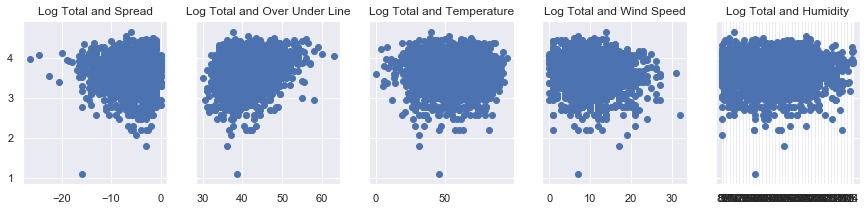

In [24]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(15,3))
ax1.scatter(df_features['spread_favorite'], log_total)
ax1.set_title('Log Total and Spread')
ax2.scatter(df_features['over_under_line'], log_total)
ax2.set_title('Log Total and Over Under Line')
ax3.scatter(df_features['weather_temperature'], log_total)
ax3.set_title('Log Total and Temperature')
ax4.scatter(df_features['weather_wind_mph'], log_total)
ax4.set_title('Log Total and Wind Speed')
ax5.scatter(df_features['weather_humidity'], log_total)
ax5.set_title('Log Total and Humidity')

plt.show()